# Übung 2 - Aufgabe 1 - Klassifikation von Katzen und Hunden

In dieser Aufgabe soll der im Buch vorgestellte Datensatz verwendet werden, um Katzen und Hunde zu klassifizieren. Im Gegensatz zur vorherigen Aufgabe soll in dieser allerdings mittels fortgeschritteneren Netzen klassifiziert werden. Verwenden Sie dazu CNNs folgender Typen:

- Ein eigenes CNN angelehnt an das aus dem Buch
- Ein VGG Ihrer Wahl
- Ein ResNet Ihrer Wahl

Verwenden Sie zusätzlich ein Netz auf Basis von Vision Transformern. Vergleichen Sie die Ergebnisse. Gehen Sie auf diese Weise vor ist es sinnvoll sich für das Training eine wiederverwendbare Funktion zu schreiben.

Diese Aufgabe ist folgendermaßen aufgebaut:

1. Vornehmen nötiger Imports
2. Laden der Daten
3. Definition des eigenen CNN
4. Anlegen der neuronalen Netze
5. Training und Tests der neuronalen Netze

## 1. Nötige Imports vornehmen

Die folgende Code-Zelle importiert die notwendigen Bibliotheken, die im Folgenden benötigt werden.

In [211]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.utils.data import DataLoader
import torchvision.datasets as datasets
import torchvision.transforms as transforms
import torchvision.models as models
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm
import numpy as np

## 2. Trainingsdaten laden

Zunächst werden die Trainingsdaten aus dem Verzeichnis geladen. Hierbei können Sie wie im Buch beschrieben vorgehen.

In [212]:
path = 'Data/'

# Hier die Daten mittels ImageFolder in Trainset und Validset einlesen
train_set = None
valid_set = None

Im Folgenden kann eines der Bilder angezeigt werden.

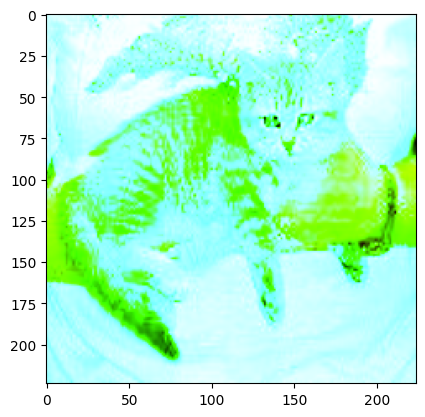

In [213]:
def imshow(inp):
    inp = inp.numpy().transpose((1, 2, 0))
    inp = np.clip(inp, 0, 1)
    plt.imshow(inp)

imshow(train_set[30][0])

Die Daten werden nun einem Data Loader übergeben, welcher eine Zufallsverteilung und eine Organisation in "batches" vornimmt.


In [214]:
train_loader = DataLoader(train_set,shuffle=True,batch_size=64,num_workers=0)
valid_loader = DataLoader(valid_set,batch_size=64,num_workers=0)

## 3. Definition des eigenen CNN

Nutzen Sie die vorgegebene Klasse CNN, um ein eigenes CNN zu implementieren. Aufgrund der Größe der Eingabebilder, sollte dieses mindestens 4-5 Conv2D-Schichten enthalten.

In [215]:
num_classes = 2

class CNN(nn.Module):
    def __init__(self):
        super().__init__()
        # Initialisieren Sie hier Ihre CNN und FC Layer.

    def forward(self, x):
        # Implementieren Sie hier die Verbindung zwischen den Layern.
        return F.log_softmax(x)

## 4. Anlegen der neuronalen Netze

Legen Sie in der nächsten Zelle die vier Netze der vorgegebenen Typen an. Denken Sie daran die Ausgabe auf die Anzahl der vorliegenden Klassen anzupassen. Beim VGG lässt sich dies im letzten Layer der Sequenz "classifier" und beim Vision Transformer im letzten Layer der Sequenz "heads" setzen. Das ResNet können Sie wie im Kapitel 3 beschrieben anpassen.

In [216]:
def prepare_vgg(model, n_classes):
    # Code für das Setzen des letzten VGG Layers
    return model

def prepare_resnet(model, n_classes):
    # Code für das Setzen des letzten ResNet Layers
    return model

def prepare_vit(model, n_classes):
    # Code für das Setzen des letzten VisionTransformer Layers
    return model

cnn = CNN()
# Hier Ihre Modelle Initialisieren und vorbereiten.
vgg = None
resnet = None
vit = None

## 5. Training des Modells

Schreiben Sie in die Funktion "train_model" die Trainingslogik der neuronalen Netze. Hier können Sie ähnlich wie bei der MNIST-Aufgabe vorgehen. Die Funktion "plot_results" kann Genauigkeit und Verlust als Plot darstellen.

In [217]:
def plot_results(epochs, training_acc, testing_acc, training_loss, testing_loss):
    plt.plot(range(epochs), training_acc, label="train_acc")
    plt.plot(range(epochs), testing_acc, label="valid_acc")
    plt.legend()
    plt.xlabel("epoch")
    plt.ylabel("accuracy")
    plt.show()

    plt.plot(range(epochs), training_loss, label="train_loss")
    plt.plot(range(epochs), testing_loss, label="valid_loss")
    plt.legend()
    plt.xlabel("epoch")
    plt.ylabel("loss")
    plt.show()

def train_model(model, epochs=10, learning_rate=0.001):
    # Hier Initialiserung der Verlustfunktion vornehmen
    loss_fn = None
    # Hier Initialiserung des Optimierers vornehmen
    optimizer = None

    training_loss = []
    testing_loss = []
    training_acc = []
    testing_acc = []

    if torch.cuda.is_available():
        model = model.to("cuda")

    with tqdm(range(epochs)) as iterator:
        for epoch in iterator:
            train_loss = 0
            train_acc = 0

            model.train()
            for images, labels in train_loader:
                if torch.cuda.is_available():
                    images = images.to("cuda")
                    labels = labels.to("cuda")

                # Hier die Ausführung des Trainings einer einzelnen Batch ergänzen
                # Bitte an die Aktualisierung von train_loss und train_acc denken!

            training_acc.append(train_acc/len(train_set))
            training_loss.append(train_loss/len(train_set))

            test_loss = 0
            test_acc = 0
            with torch.no_grad():
                for images, labels in valid_loader:
                    if torch.cuda.is_available():
                        images = images.to("cuda")
                        labels = labels.to("cuda")
                    # Hier die Ausführung des Tests einer einzelnen Batch ergänzen
                    # Bitte an die Aktualisierung von test_loss und test_acc denken!


                testing_acc.append(test_acc/len(valid_set))
                testing_loss.append(test_loss/len(valid_set))

            iterator.set_postfix_str(f"train_acc: {train_acc/len(train_set):.2f} test_acc: {test_acc/len(valid_set):.2f} train_loss: {train_loss/len(train_set):.2f} test_loss: {test_loss/len(valid_set):.2f}")

    plot_results(epochs, training_acc, testing_acc, training_loss, testing_loss)


Wenn Sie Ihre Funktion "train_model" korrekt implementiert haben und Ihre Modelle definiert sind, können Sie ihre Modelle in den folgenden vier Zellen trainieren lassen. Da der Datensatz recht groß ist, würde ich ein Training auf 3-10 Epochen begrenzen. Falls Sie eine Cuda-fähige Grafikkarten besitzen, können Sie auch länger trainieren.

  0%|          | 0/3 [00:00<?, ?it/s]

C:\Users\Sebastian\AppData\Local\Temp\ipykernel_22296\2085559175.py:28: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)


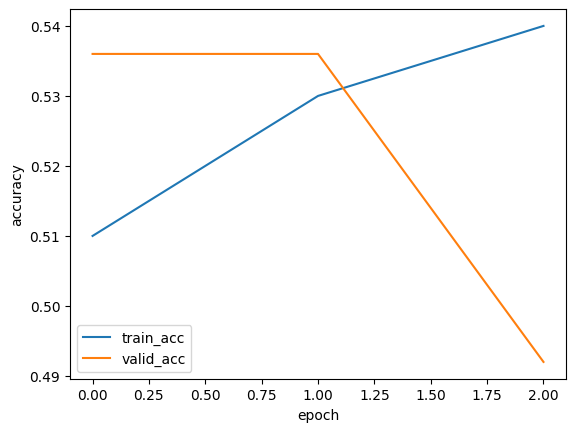

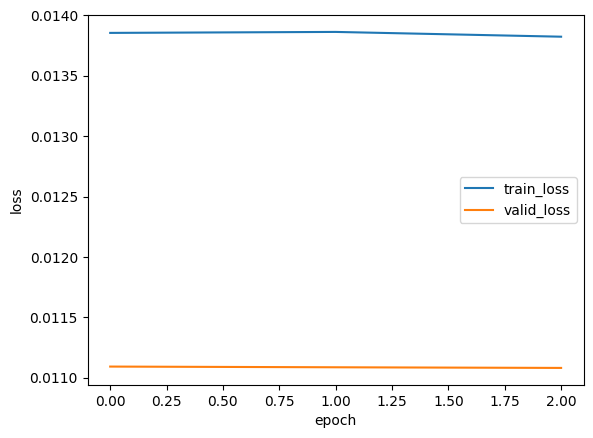

In [218]:
train_model(cnn)

  0%|          | 0/3 [00:00<?, ?it/s]

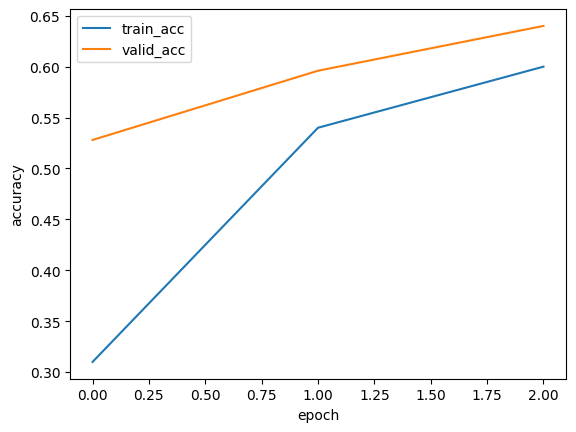

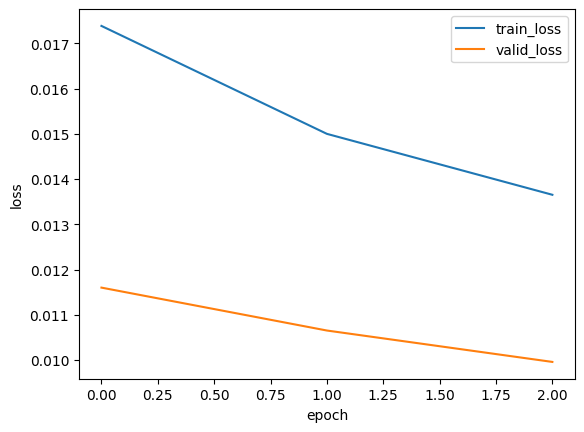

In [219]:
train_model(vgg)

  0%|          | 0/3 [00:00<?, ?it/s]

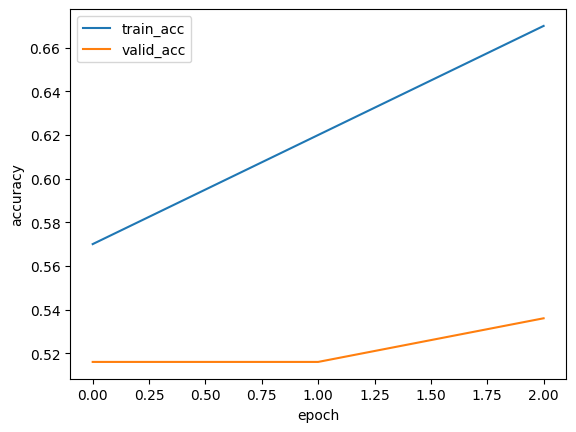

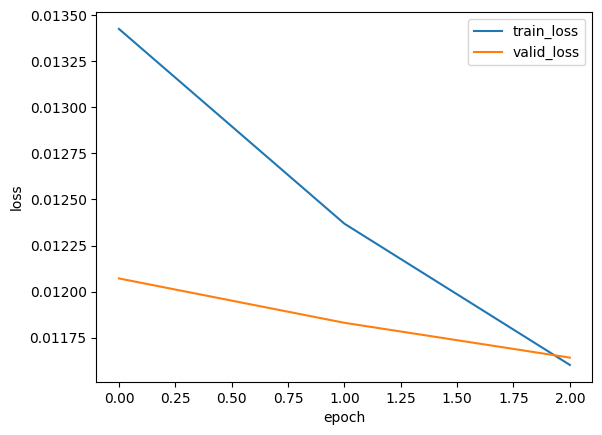

In [220]:
train_model(resnet)

  0%|          | 0/3 [00:00<?, ?it/s]

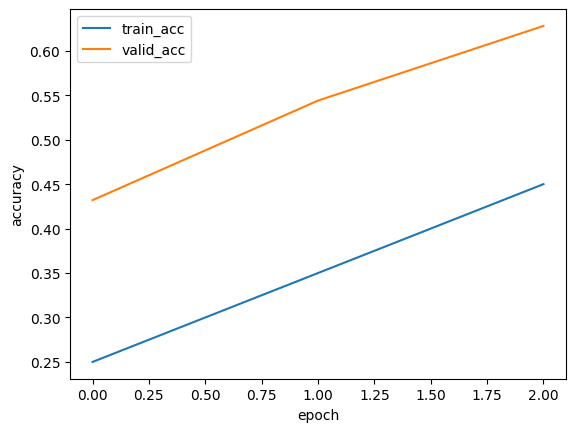

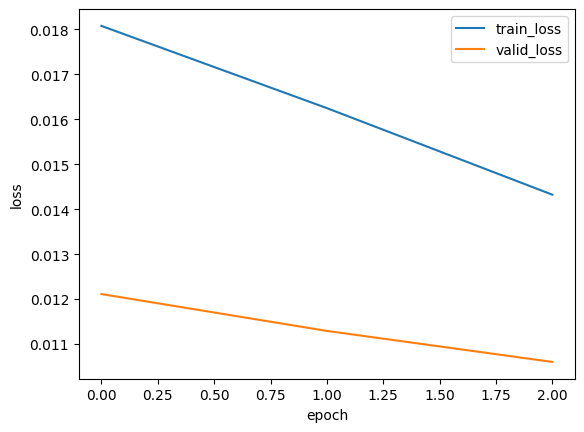

In [221]:
train_model(vit)